# Model Development

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('auto.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# 1. Linear Regression and Multiple Linear Regression

### Linear Regression

One example of a Data Model that we will be using is:

### Simple Linear Regression
Simple Linear Regression is a method to help us understand the relationship between two variables:

The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

Y
:
R
e
s
p
o
n
s
e
 
V
a
r
i
a
b
l
e
X
:
P
r
e
d
i
c
t
o
r
 
V
a
r
i
a
b
l
e
s
Linear Function
Y
h
a
t
=
a
+
b
X
 
a refers to the intercept of the regression line, in other words: the value of Y when X is 0
b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

# Let's load the modules for linear regression:

In [8]:
from sklearn.linear_model import LinearRegression

# Creating linear regression object

In [10]:
lm = LinearRegression()
lm

LinearRegression()

# How could "highway-mpg" help us predict car price?

For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [11]:
X = df[['highway-mpg']]
Y = df[['price']]

Fit the linear model using highway-mpg

In [12]:
lm.fit(X,Y)

LinearRegression()

We can output a prediction

In [13]:
pred = lm.predict(X)
pred[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

## What is the value of the intercept (a)?

In [14]:
lm.intercept_

array([38423.30585816])

## What is the value of the slope (b)?

In [16]:
lm.coef_

array([[-821.73337832]])

# Create a linear regression object called "lm1"

In [18]:
lm1 = LinearRegression()
lm1

LinearRegression()

## Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [21]:
X = df[['engine-size']]
Y= df[['price']]

In [22]:
lm1.fit(X,Y)

LinearRegression()

## Find the slope and intercept of the model.

In [23]:
lm1.intercept_

array([-7963.33890628])

In [24]:
lm1.coef_

array([[166.86001569]])

## What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

In [26]:
price = -7963.33890628 + 166.86001569*X

In [27]:
price = -7963.33890628 + 166.86001569*df['engine-size']

In [28]:
price

0      13728.463133
1      13728.463133
2      17399.383479
3      10224.402804
4      14729.623228
           ...     
196    15563.923306
197    15563.923306
198    20903.443808
199    16231.363369
200    15563.923306
Name: engine-size, Length: 201, dtype: float64

# Multiple Linear Regression
What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

From the previous section we know that other good predictors of price could be:

- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg


Let's develop a model using these variables as the predictor variables

In [30]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

Fit the linear model using four above-mentioned variables.

In [31]:
lm.fit(Z, df['price'])

LinearRegression()

What is the value of intercept?

In [32]:
lm.intercept_

-15806.624626329198

What is the value of slope?

In [33]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

As we saw above, we should get a final linear function with the structure:
    
    Y = a+b1X1+b2X2+b3X3+b4X4

In [39]:
price = -15806.624626329198+ 53.49574423*df['horsepower'] + 4.70770099*df['curb-weight'] + 81.53026382*df['engine-size'] + 36.05748882*df['highway-mpg']

In [40]:
print(price)

0      13699.111600
1      13699.111600
2      19051.654690
3      10620.361920
4      15521.314189
           ...     
196    16694.400424
197    19503.679188
198    20475.458366
199    17804.038799
200    17104.075066
Length: 201, dtype: float64


## Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [41]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']],df['price'])

LinearRegression()

### Find the coefficient of the model.

In [42]:
lm2.coef_

array([   1.49789586, -820.45434016])

# 2. Model Evaluation Using Visualization

Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

Import the visualization package, seaborn:

In [44]:
#importing the visualization packages
import seaborn as sns
%matplotlib inline

## Regression Plot

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize highway-mpg as potential predictor variable of price:

(0.0, 48180.26280606407)

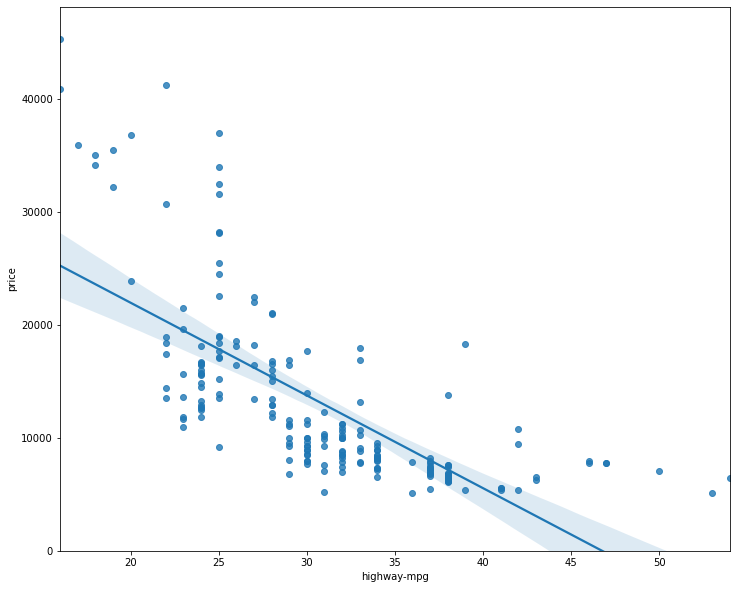

In [45]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg", y="price",data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

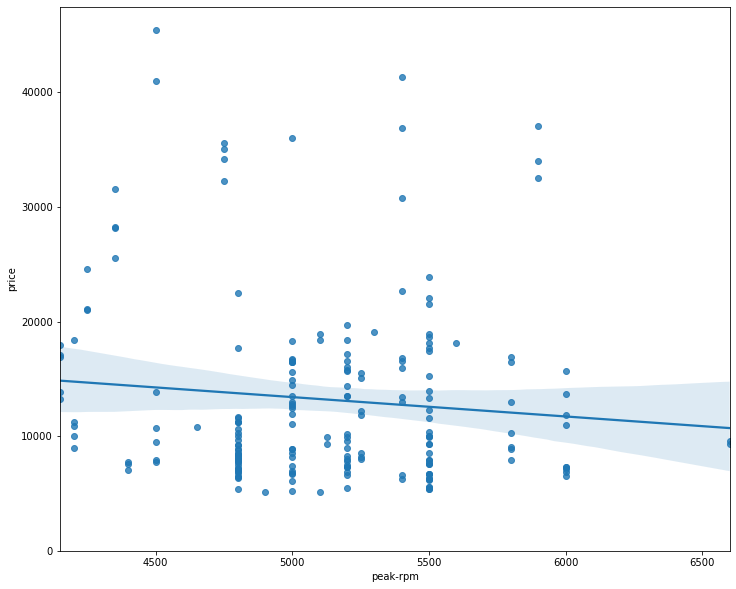

In [46]:
plt.figure(figsize=(width,height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

### Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [47]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


# Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

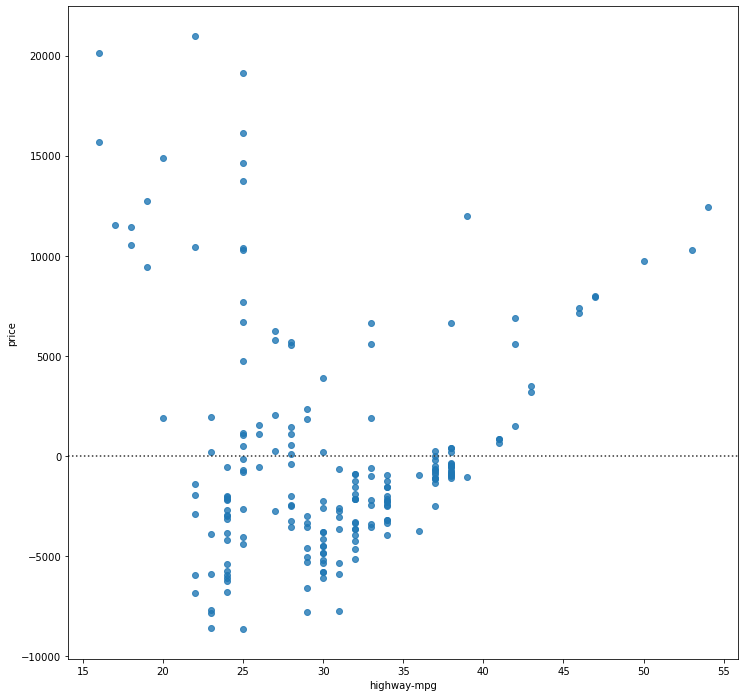

In [48]:
width = 12
height = 12
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show

### What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

# Multiple Linear Regression

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction:

In [54]:
pred = lm.predict(Z)

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


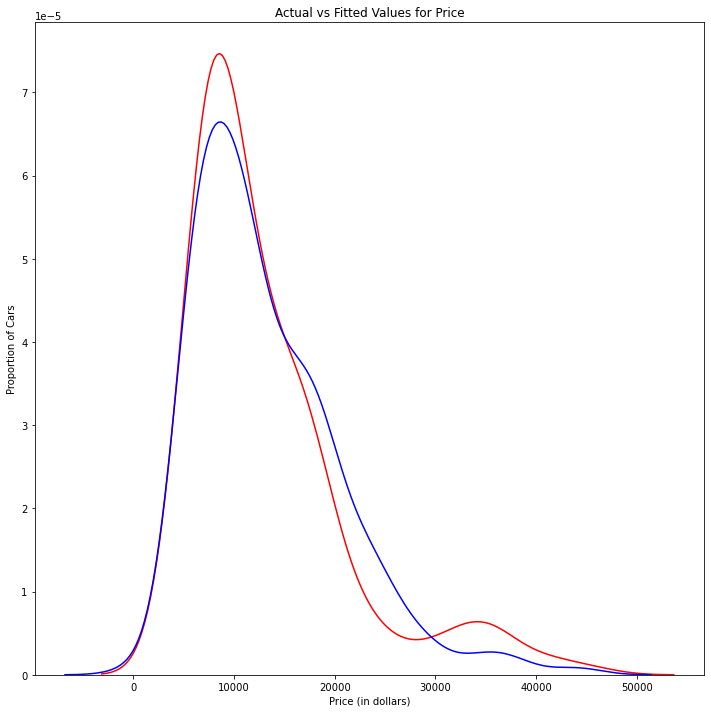

In [55]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

# 3. Polynomial Regression and Pipelines

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:

In [56]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's get the variables

In [57]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [58]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x,y,3)
p =np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function

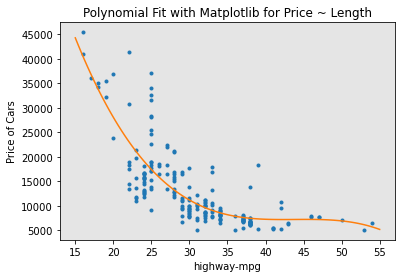

In [59]:
PlotPolly(p,x,y,'highway-mpg')

In [60]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

### Create 11 order polynomial model with the variables x and y from above.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


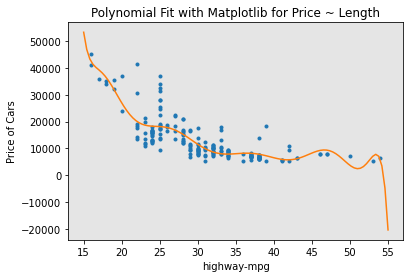

In [61]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'highway-mpg')

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:

In [62]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2:

In [63]:
pr= PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [64]:
Z_pr = pr.fit_transform(Z)

In the original data, there are 201 samples and 4 features.

In [65]:
Z.shape

(201, 4)

After the transformation, there are 201 samples and 15 features.

In [66]:
Z_pr.shape

(201, 15)

# Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [68]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

We input the list as an argument to the pipeline constructor:

In [70]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [71]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [72]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [75]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# 4. Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

## Model 1: Simple Linear Regression

Let's calculate the R^2:

In [76]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


Let's calculate MSE:

In [77]:
pred=lm.predict(X)
print('The output of the first four predicted value is: ', pred[0:4])

The output of the first four predicted value is:  [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]]


Let's import the function mean_squared_error from the module metrics:

In [78]:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:

In [79]:
mse = mean_squared_error(df['price'], pred)
print('The mean square error of price and predicted value is:', mse)

The mean square error of price and predicted value is: 15021126.02517414


## Model 2: Multiple Linear Regression

Let's calculate the R^2:

In [80]:
#fit the model
lm.fit(Z,df['price'])

#find the r^2:
print('The R^2 is:' , lm.score(Z,df['price']))

The R^2 is: 0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate MSE:

In [81]:
pred_multifit = lm.predict(Z)

In [83]:
print('The mean squared error of price and predicted value using multifit is: ', mean_squared_error(df['price'],pred_multifit))

The mean squared error of price and predicted value using multifit is:  11980366.87072649


## Model 3: Polynomial Fit

Let's calculate the R^2.

Let’s import the function r2_score from the module metrics as we are using a different function.

In [84]:
from sklearn.metrics import r2_score

We apply the function to get the value of R^2:

In [85]:
r_squared = r2_score(y,p(x))
print('The R-square value is:', r_squared)

The R-square value is: 0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

## MSE

We can also calculate the MSE

In [86]:
mean_squared_error(df['price'], p(x))

20474146.426361218

# 5. Prediction and Decision Making

## Prediction

In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [87]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Create a new input

In [90]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model:

In [91]:
lm.fit(X,Y)

LinearRegression()

Produce a prediction

In [92]:
pred = lm.predict(new_input)
pred[0:5]

array([[-7796.47889059],
       [-7629.6188749 ],
       [-7462.75885921],
       [-7295.89884352],
       [-7129.03882782]])

We can plot the data

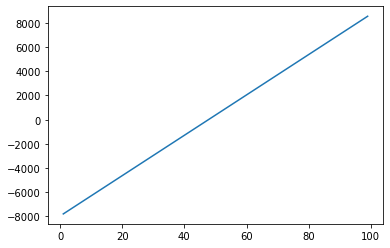

In [93]:
plt.plot(new_input,pred)
plt.show()

## Decision Making: Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

- What is a good R-squared value?

When comparing models, the model with the higher R-squared value is a better fit for the data.

- What is a good MSE?

When comparing models, the model with the smallest MSE value is a better fit for the data.

## Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)¶

Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

- MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.

- R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).


This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

# Conclusion¶

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.